In [ ]:
!pip install simpletransformers
#This library is based on the Transformers library by HuggingFace
#https://pypi.org/project/simpletransformers/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load & install things
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import pickle
import logging
import torch

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.INFO)

from simpletransformers.language_modeling import LanguageModelingModel
from simpletransformers.classification import ClassificationModel

In [ ]:
!pip install apex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from apex import amp
# This way of intalling is for colab instance. Its using NVIDIA apex.
!git clone https://github.com/NVIDIA/apex
%cd apex
!python3 setup.py install

Cloning into 'apex'...
remote: Enumerating objects: 10686, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 10686 (delta 120), reused 130 (delta 71), pack-reused 10478
Receiving objects: 100% (10686/10686), 15.20 MiB | 18.60 MiB/s, done.
Resolving deltas: 100% (7347/7347), done.
/content/apex/apex/apex


torch.__version__  = 1.13.0+cu116


running install
running bdist_egg
running egg_info
creating apex.egg-info
writing apex.egg-info/PKG-INFO
writing dependency_links to apex.egg-info/dependency_links.txt
writing requirements to apex.egg-info/requires.txt
writing top-level names to apex.egg-info/top_level.txt
writing manifest file 'apex.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'apex.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/apex
copying apex/_autocast_utils.py -

In [ ]:
from apex import amp # For authentication

In [ ]:
torch.cuda.is_available()
#CUDA Python provides uniform APIs and bindings for inclusion into existing toolkits and libraries to simplify GPU-based parallel processing for HPC, data science, and AI.
#https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html
#a CUDA kernel is a function that is executed on the GPU

True

In [ ]:
# Fine tune the pretrained Language model on generic Twitter data (unsupervised)

model_args = {
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 1000,
    "use_cuda":True,
    'overwrite_output_dir':True
}
train_file = "RANDTwitterCorpus.txt"

model = LanguageModelingModel(
    "gpt2",
    'gpt2',
    args=model_args,
    train_files=train_file
)

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

loading file vocab.json from cache at cache_dir/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/vocab.json
loading file merges.txt from cache at cache_dir/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

loading configuration file config.json from cache at cache_dir/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.25.1",
  "

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at cache_dir/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/pytorch_model.bin
All model checkpoint weights were used when initializing GPT2LMHeadModel.

All the weights of GPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GPT2LMHeadModel for predictions without further training.


In [ ]:
model.train_model(train_file)

AssertionError: ignored

In [ ]:
# Concatenate DASA data
dasa = pd.DataFrame()
for i in range(33):
  print(i)
  with open('dasa_'+str(i)+'.pkl', 'rb') as f:
    g = pickle.load(f, encoding='latin1')
    dasa = pd.concat([dasa, g], ignore_index = True)

0


FileNotFoundError: ignored

In [ ]:
# Make troll/not troll classifier
dasa.head()

,_text_,name,language,stance__AbstractConcepts,stance__CommunicatorRole,stance__LangRef,stance__Attack_Citation,stance__Authoritative_Citation,stance__Citations,stance__Contested_Citation,stance__Neg_Citation,stance__Precedent_Defending,stance__Quotation,stance__Repair_Citation,stance__Speculative_Citation,stance__Metadiscourse,stance__Neutral_Attribution,stance__PersonProperty,stance__PersonPronoun,stance__DialogCues,stance__OralCues,stance__SenseObject,stance__SenseProperty,stance__Motions,stance__SceneShift,stance__SpaceRelation,stance__ConfirmExperience,stance__ErrorRecovery,stance__Imperative,stance__MoveBody,stance__Procedures,stance__Insist,stance__Prohibitive,stance__Comparison,stance__Resemblances,stance__Definition,stance__Numbers,stance__Specifiers,stance__Example,stance__Exceptions,...,stance__ReasonBackward,stance__ReasonForward,stance__Support,stance__Contingency,stance__Concessive,stance__DenyDisclaim,stance__Resistance,stance__Precedent_Setting,stance__Substitution,stance__Transformation,stance__Updates,stance__ReportingEvents,stance__Cause,stance__Consequence,stance__GenericEvents,stance__MatureProcess,stance__RecurringEvents,stance__Sequence,stance__ReportingStates,stance__Confidence,stance__FirstPer,stance__Autobio,stance__SelfDisclosure,stance__SelfReluctance,stance__Disclosure,stance__Immediacy,stance__Intensity,stance__PrivateThinking,stance__SubjectivePercept,stance__Uncertainty,stance__PredictedFuture,stance__ProjectAhead,stance__Future_in_Past,stance__ProjectBack,stance__SubjectiveTime,stance__TimeDate,stance__TimeDuration,stance__TimeShift,code__author,code__code
0,over Hillary Clinton �����https://t.co/IPsWHT1...,Nate_Rasmussen,en,4.752234,0.040617,0.040617,0.0,0.0,0.324939,0.000000,0.00000,0.0,0.731113,0.0,0.0,0.284322,0.000000,1.096669,0.121852,0.406174,0.243704,1.259139,0.203087,0.284322,0.121852,0.446791,0.0,0.0,0.081235,0.0,0.000000,0.121852,0.0,0.446791,0.000000,0.0,0.649878,0.487409,0.0000,0.040617,...,0.000000,0.000000,0.0,0.324939,0.203087,0.446791,0.771730,0.0,0.000000,0.203087,0.487409,1.421608,0.0,0.0,0.324939,0.0,0.243704,0.203087,0.852965,0.203087,0.324939,0.000000,0.16247,0.0,0.081235,0.528026,0.324939,0.000000,0.406174,0.040617,0.203087,0.406174,0.0,0.812348,0.040617,0.081235,0.162470,0.040617,Nate_Rasmussen,liberal
1,@realDonaldTrump @SpeakerRyan The whole countr...,peggysbh,en,4.192355,0.000000,0.041102,0.0,0.0,0.328812,0.000000,0.00000,0.0,0.904233,0.0,0.0,0.041102,0.000000,1.191944,0.205508,0.328812,0.164406,0.698726,0.452117,0.452117,0.000000,1.027538,0.0,0.0,0.164406,0.0,0.164406,0.246609,0.0,0.493218,0.164406,0.0,0.863132,0.205508,0.0000,0.000000,...,0.000000,0.000000,0.0,0.164406,0.000000,0.246609,0.616523,0.0,0.000000,0.123305,0.369914,1.644061,0.0,0.0,0.246609,0.0,0.205508,0.205508,0.822030,0.246609,0.328812,0.000000,0.00000,0.0,0.164406,0.575421,0.369914,0.082203,0.493218,0.369914,0.000000,0.205508,0.0,0.411015,0.328812,0.000000,0.657624,0.000000,peggysbh,conservative
2,Pence reaffirms plans to 'repeal and replace' ...,KARENPARKER93,en,3.295572,0.051493,0.205973,0.0,0.0,0.463440,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.205973,0.102987,1.596292,0.463440,0.205973,0.154480,1.390319,0.308960,0.411946,0.102987,0.463440,0.0,0.0,0.411946,0.0,0.000000,0.205973,0.0,0.308960,0.154480,0.0,0.617920,0.205973,0.0000,0.000000,...,0.000000,0.000000,0.0,0.720906,0.051493,0.205973,0.308960,0.0,0.051493,0.360453,0.308960,1.647786,0.0,0.0,0.360453,0.0,0.102987,0.360453,0.617920,0.205973,0.411946,0.102987,0.30896,0.0,0.051493,0.411946,0.875386,0.154480,0.514933,0.102987,0.257467,0.978373,0.0,0.669413,0.154480,0.102987,1.029866,0.102987,KARENPARKER93,RightTroll
3,Nuclear Threat REDUCED to SAFEST LEVELS After ...,wendyhullfish,en,5.704837,0.000000,0.000000,0.0,0.0,0.248036,0.082679,0.00000,0.0,0.165358,0.0,0.0,0.000000,0.000000,1.446879,0.289376,0.165358,0.248036,1.240182,0.330715,0.454733,0.165358,0.785449,0.0,0.0,0.082679,0.0,0.124018,0.248036,0.0,0.124018,0.000000,0.0,0.372055,0.165358,0.0000,0

In [ ]:
trollnottroll = dasa[['_text_','code__code']]

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
trollnottroll = dasa[['_text_','code__code']]
trollnottroll['label'] = 1*np.logical_or(trollnottroll['code__code'] == 'RightTroll', trollnottroll['code__code'] == 'LeftTroll')
trollnottroll.drop('code__code', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
trollnottroll.head()

,_text_,label
0,over Hillary Clinton �����https://t.co/IPsWHT1...,0
1,@realDonaldTrump @SpeakerRyan The whole countr...,0
2,Pence reaffirms plans to 'repeal and replace' ...,1
3,Nuclear Threat REDUCED to SAFEST LEVELS After ...,0
4,to ask Judge Curiel not to release vids of Tru...,0


In [ ]:
train = trollnottroll.loc[:int(0.8*len(trollnottroll))]
test = trollnottroll.loc[int(0.8*len(trollnottroll)):]

In [ ]:
class_model_args = {
    "use_early_stopping": True,
    "num_train_epochs": 1,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 1000,
    "use_cuda":True,
    "overwrite_output_dir":True
}

# Create a ClassificationModel
classification_model = ClassificationModel('bert', 'bert-base-uncased', args=class_model_args) # You can set class weights by using the optional weight argument


INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /root/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517
INFO:transformers.configuration_utils:Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "type_vocab_size": 2,
  "vocab_size": 30522
}

INFO:transformers.modeling_utils:loading weights file https://cdn.huggingface.co/bert-base-uncased-pytorch_model.bin from cache at /root/.cache/torch/transformers/f2ee78bdd635b758cc

In [ ]:
classification_model.train_model(train)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:267: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the data

trolls_file = open('trolls_c.pk1', 'rb')
trolls = pickle.load(trolls_file)
trolls_file.close()


In [ ]:
righttrolls = trolls.loc[np.where(trolls['account_category']=='RightTroll')]

In [ ]:
lefttrolls = trolls.loc[np.where(trolls['account_category']=='LeftTroll')]

In [ ]:
righttrolls['cat'] = 0
lefttrolls['cat'] = 1

In [ ]:
rightTrain = righttrolls[:4000][['content','cat']]
rightTest = righttrolls[4000:6000][['content','cat']]
leftTrain = lefttrolls[:4000][['content','cat']]
leftTest = lefttrolls[4000:6000][['content','cat']]
train_df = pd.concat([rightTrain, leftTrain])
test_df = pd.concat([rightTest, leftTest])
train_df['content'] = train_df['content'].str.encode('ascii', 'ignore').str.decode('ascii')

In [ ]:
model.train_model(train_file)

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/bert_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 3.515783

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:114: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 2.941347Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 3.837984Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 3.403259

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 3.504331


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


INFO:simpletransformers.language_modeling.language_modeling_model: Training of bert model complete. Saved to outputs/.


In [ ]:
# Supervised training on labeled data

class_model_args = {
    "use_early_stopping": True,
    "num_train_epochs": 5,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 1000,
    "use_cuda":True
}

# Create a ClassificationModel
classification_model = ClassificationModel('bert', 'outputs/checkpoint-1585-epoch-1', args=class_model_args) # You can set class weights by using the optional weight argument


In [ ]:
# Train the model
classification_model.train_model(train_df)


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


INFO:simpletransformers.classification.classification_model:   Continuing training from checkpoint, will skip to saved global_step
INFO:simpletransformers.classification.classification_model:   Continuing training from epoch 1
INFO:simpletransformers.classification.classification_model:   Continuing training from global step 1585
INFO:simpletransformers.classification.classification_model:   Will skip the first 585 steps in the current epoch


Running loss: 0.563872

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:114: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.759906Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 1.129737Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 0.632642

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.217397Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.261164

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 1.378794Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 0.807600


Running loss: 0.030822


Running loss: 0.290375Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 0.002347



INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


In [ ]:
# Evaluate the model
result, model_outputs, wrong_predictions = classification_model.eval_model(test_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.7487926421451331, 'tp': 1794, 'tn': 1702, 'fp': 298, 'fn': 206, 'eval_loss': 0.6173018273264169}


In [ ]:
result

{'eval_loss': 0.6173018273264169,
 'fn': 206,
 'fp': 298,
 'mcc': 0.7487926421451331,
 'tn': 1702,
 'tp': 1794}

In [ ]:
wrong_predictions[0].text_a

'COMPARISON VIDEO: Trump Condemns Hate While Obama Defends it  BREAKING : Look Who is Claiming Trump Will Resign Soon  BREAKING : ISIS Claims Responsibility!  BREAKING! This New Evidence Just Implicated All of Them!!!  BREAKING : Lincoln Statue Found Burnt to a Crisp in Chicago!  Terror Group CAIR Issues Anti-Confederate DEMANDS  Antifa THUG Punches Black Trump Supporter and INSTANTLY Regrets it  BREAKING! INDICTED ON FOUR COUNTS!  BREAKING : Antifa Members Surrender to Police and Chant Like Insane Cult  Trump Supporters Band Together to Preserve our Nation’s History  CNN Commentator DEMANDS Founding Father Statues COME DOWN  Look What Leftists THUGS Just Did to the NH GOP Headquarters  BREAKING VIDEO : Multiple ISIS Terrorists KILLED By Spanish Police!  WTF VIDEO : Look What LOSER Al Gore is Suggesting Trump Do  The NY Times Just Reached a NEW LOW in Trying to Prove Trump is RACIST  House Dem Trying To Impeach Trump Based on His Charlottesville Response  Look What Liberals Did to This

In [ ]:
model_outputs

array([[ 3.6542969, -3.7539062],
       [ 3.5859375, -3.6894531],
       [ 3.3652344, -3.4550781],
       ...,
       [-4.2421875,  4.4648438],
       [-4.1757812,  4.375    ],
       [-4.2773438,  4.4921875]], dtype=float32)

(array([ 760.,  956.,  123.,   37.,   44.,   39.,   53.,  246.,  377.,
        1365.]),
 array([-3.8105469 , -2.9783204 , -2.1460938 , -1.3138672 , -0.48164064,
         0.35058594,  1.1828125 ,  2.015039  ,  2.8472657 ,  3.6794922 ,
         4.5117188 ], dtype=float32),
 <a list of 10 Patch objects>)

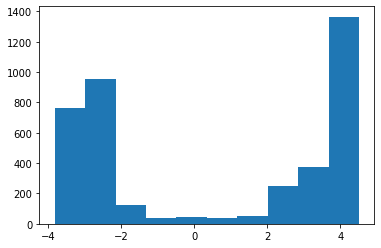

In [ ]:
plt.hist(model_outputs[:,1])